In [20]:
# Cloud-based ETL Pipeline Project 

import pandas as pd

# UCI dataset URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

df = pd.read_excel(url)                             # Read the Excel file from URL

df.to_csv('Sales_dataset.csv', index=False)         # Save to a local CSV, idex=false because to Don't write the row index (the left-most numbers) into the CSV file
                                                    # We usually use that to keep the file clean and only include actual data columns — not internal row numbers.

# or directly read it from folder(epude ade chedam, paina process yekuva time tesukunta undi) 


In [3]:
import pandas as pd

df = pd.read_excel("C:/Users/navee/Desktop/IDEs/Python/Practice projects/Cloud- Based ETL Project/Sales_Dataset.xlsx")  

print(df.head())     # checcking 5 rows to confirm it is working or not 


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [5]:
pip install boto3

   ---------------------------------------- 0.0/13.8 MB ? eta -:--:--
   -------- ------------------------------- 2.9/13.8 MB 14.0 MB/s eta 0:00:01
   -------------------- ------------------- 7.1/13.8 MB 17.5 MB/s eta 0:00:01
   ------------------------------ --------- 10.5/13.8 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------  13.6/13.8 MB 17.1 MB/s eta 0:00:01
   ---------------------------------------- 13.8/13.8 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.69
    Uninstalling botocore-1.34.69:
      Successfully uninstalled botocore-1.34.69
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.39.3 which is incompatible.


In [26]:
# Epudu AWS lo una file ni Python use chesi read chedam .....

import boto3
import pandas as pd
from io import BytesIO                                       # Convert binary stream to a readable format

s3 = boto3.client('s3')                                      # Connect to S3

bucket_name = 'for-myprojects'                               # Your S3 bucket name
file_key = 'Sales_Dataset.xlsx'                              # Your uploaded file name

response = s3.get_object(Bucket=bucket_name, Key=file_key)   # Download the file
df = pd.read_excel(BytesIO(response['Body'].read()))         # Read Excel file

print(df.head())                                             # Preview the first few rows


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [28]:
print(df.shape)             # Check number of rows and columns
print(df.columns)           # List all column names
print(df.dtypes)            # Check data types of each column
df.head()                   # Preview top rows
print(df.isnull().sum())    # Count missing values column-wise


# So Depending on what we find: we will Drop unnecessary columns, Fill or drop missing values, Convert data types (e.g., date, float) and Fix column names.


(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [34]:
# Isssues came are - Two columns haing missing values , so we are removing them - 

# Drop rows where CustomerID is missing, as it's a large chunk but usually critical
df = df.dropna(subset=['CustomerID'])     # Remove rows with null CustomerID

# Fill missing Description with placeholder (or you can choose to drop them too)
df['Description'] = df['Description'].fillna('No description')   # Replace nulls with string

# Convert CustomerID to integer (it's float because of NaNs earlier)
df['CustomerID'] = df['CustomerID'].astype(int)   # Change float to int after removing nulls

# Cheking after above cleaning step - 
print(df.isnull().sum())      # Confirm no nulls remain
print(df.dtypes)              # Confirm correct datatypes
df.head()                     # Final quick preview


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


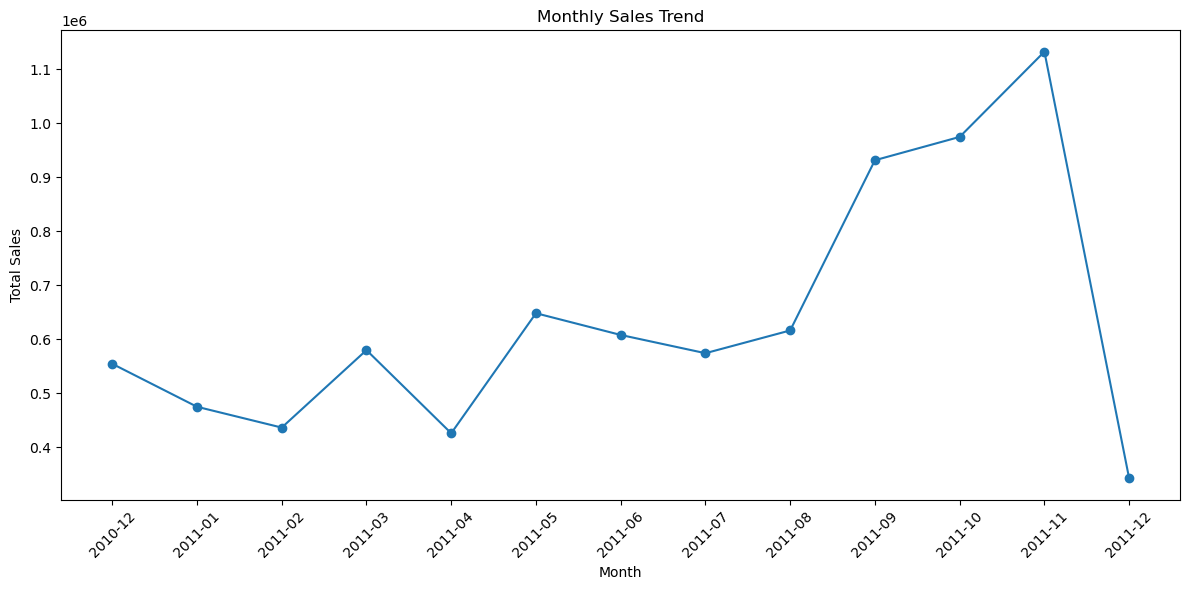

In [44]:
# Tranformation Part -- 

# creating new column = Quantity × Unit Price = Total Revenue for each row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']     

# Analyze time-based trends ( a basic monthly sales trend analysis ) 

# First, extract Year and Month from InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')      # Convert to "YYYY-MM" format ( df['InvoiceDate'] → This is a datetime column (like 2010-12-01 08:26:00)
                                                           #  .to_period('M') → Converts that datetime to a Period object at monthly level(year-month=2023-07).
                                                           #  (M) because it means year-month , for year it is just year , for days it is - year-month-day...

# Now group by YearMonth and sum TotalPrice
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

# Plot the result
import matplotlib.pyplot as plt            # matplotlib for visualisation

plt.figure(figsize=(12, 6))                   
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['TotalPrice'], marker='o')      # Ploting a line with dots for each month
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



In [ ]:
# Now saving the changed file- one copy to Folder(local) and one copy to AWS S3

df.to_csv('Sales_Cleaned.csv', index=False)       # saving into local file 





In [56]:
df.to_excel('Sales_Cleaned.xlsx', index=False)   # Saves file locally in your notebook's directory


from io import BytesIO

buffer = BytesIO()                                 # Create an in-memory binary buffer
df.to_excel(buffer, index=False)                   # Write DataFrame to buffer in Excel format
buffer.seek(0)                                     # Reset pointer to start of buffer

s3.upload_fileobj(                                 # Upload buffer to S3
    buffer, 
    Bucket='for-myprojects',                       # S3 bucket
    Key='cleaned/Sales_Cleaned.xlsx'               # Saving under 'cleaned/' folder - Done saving .. 
)


In [3]:
# just re-opned so running necessary libraries 
import boto3                        # To connect with AWS S3
import pandas as pd                # For data manipulation
from io import BytesIO             # For handling binary stream (Excel from S3)
import matplotlib.pyplot as plt    # For visualizations

# reconnecting to S3 
s3 = boto3.client('s3')

In [6]:
# making small chage for the stokecodes to align properly 

import pandas as pd

# Load Excel file
df = pd.read_excel("C:/Users/navee/Desktop/IDEs/Python/Practice projects/Cloud- Based ETL Project/Sales_Cleaned.xlsx")


In [14]:
# Ensuring all StockCode values are string type
df['StockCode'] = df['StockCode'].astype(str)

# saving the updated file to local folder and to S3 

df.to_excel('Sales_Cleaned.xlsx', index=False)    # local folder 

s3 = boto3.client('s3')                           # S3

buffer = BytesIO()
df.to_excel(buffer, index=False)
buffer.seek(0)

s3.upload_fileobj(
    buffer,
    Bucket='for-myprojects',
    Key='cleaned/Sales_Cleaned.xlsx'
)

In [16]:
# Loading the Data from S3 to Redshift(it is like datawarehouse- we can do query with data like SQL)  

# Redshift doesn’t allow you to directly load files from your local machine using Python or the console. 
# Instead, it requires the file to be stored in S3 so it can use the COPY command to load data efficiently.

# Save as CSV locally
df.to_csv("Sales_Cleaned.csv", index=False)

buffer = BytesIO()                    # Upload CSV to S3
df.to_csv(buffer, index=False)
buffer.seek(0)

s3.upload_fileobj(
    buffer,
    Bucket='for-myprojects',
    Key='cleaned/Sales_Cleaned.csv'  
)


# So once this is done - Go to AWS console and do loading data into redshift from S3... 
# Then Load data into PowerBI from redshift to generate visual reports 

hello
